In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
import mnist

y = mnist.train_labels()

# Images are returned as a 3D numpy array (samples * rows * columns). To train machine learning models,
# usually a 2D array is used (samples * features).
# To get it, simply use:

images = mnist.train_images()
X = images.reshape((images.shape[0], images.shape[1] * images.shape[2]))

In [3]:
X.shape

(60000, 784)

In [4]:
y.shape

(60000,)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
some_digit = X[35]

In [7]:
some_digit_image = some_digit.reshape(28,28)

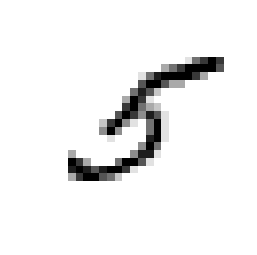

In [8]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [9]:
# this looks like an 5, lets look at the label

In [10]:
# binary classifier

y[35]

5

In [11]:
# lets create our test and training sets

In [12]:
X_train = X
y_train = y

# 3D to 2D
X_test_images = mnist.test_images()
X_test = X_test_images.reshape((X_test_images.shape[0], X_test_images.shape[1] * X_test_images.shape[2]))

y_test = mnist.test_labels()


In [13]:
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [14]:
import numpy as np

In [15]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [16]:
# lets train a simple binary classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [18]:
# lets use the model to predict
sgd_clf.predict([some_digit])

array([False])

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.9605 , 0.95595, 0.95375])

In [21]:
from sklearn.base import BaseEstimator

In [22]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [23]:
never_5_clf = Never5Classifier()

In [24]:
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.909  , 0.90745, 0.9125 ])

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
# this creates predictions without using our test set
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [27]:
# print first few elements
y_train_pred[:10]

array([False, False, False, False, False, False, False, False,  True,
       False])

# Confusion Matrix 

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
# actual on the rows and predicted on the columns, so row(non 5, 5) col(non 5, 5)
# row(TN,FN), col(FP,TP)
confusion_matrix(y_train_5,y_train_pred)

array([[52972,  1607],
       [  989,  4432]])

In [30]:
# precision and recall
from sklearn.metrics import precision_score, recall_score

In [31]:
# precision tells you how many were correct
# TP / TP + FP
precision_score(y_train_5,y_train_pred)

0.7338963404537175

In [32]:
c_matrix = confusion_matrix(y_train_5,y_train_pred)

In [33]:
type(c_matrix)

numpy.ndarray

In [34]:
# manual precision calculation
c_matrix[1][1]/(c_matrix[1][1]+c_matrix[0][1])

0.7338963404537175

In [35]:
# recall = TP / TP + FN
# recall tells you the proportion of how many were predicted vs how many should have been
# in other words if you sum the bottom row, actual(5) vs col(precited non 5, 5) its the amount that was predicted well
# vs what should also have been included
# so the recall score means the model only detects 80% of the 5's
# where as prediciton is about % time model is correct
recall_score(y_train_5,y_train_pred)

0.8175613355469471

precision and recall into a single metric

In [36]:
# harmonic mean
from sklearn.metrics import f1_score

In [37]:
f1_score(y_train_5,y_train_pred)

0.7734729493891798

In [38]:
y_scores = sgd_clf.decision_function([some_digit])

In [39]:
y_scores

array([-10770.25850009])

In [40]:
threshold = 0

In [41]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [42]:
# raising the threshold decreases recall
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [43]:
# how to decide what threshold to use
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [44]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [45]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

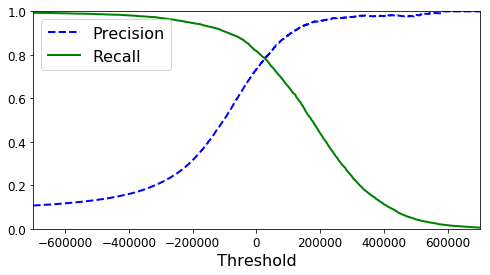

In [46]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
# save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [47]:
# in the above graph you can choose which threshold to give you the best precision/recall tradeoff for your task

In [48]:
# using graph you can establish a 70K threshold to give around 90% precision
y_train_pred_90 = (y_scores > 70000)

In [49]:
precision_score(y_train_5,y_train_pred_90)

0.855198572066042

In [50]:
recall_score(y_train_5,y_train_pred_90)

0.7070651171370596

# ROC Curve

In [51]:
# receiver operating characteristic curve
# true positive rate (tpr) aka recall vs false positive rate (fpr)
from sklearn.metrics import roc_curve

In [52]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

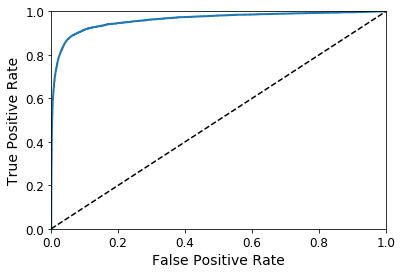

In [53]:
# dotted line below represents ROC curve of a random classifier (benchmark)

def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [54]:
# area under the curve (auc)
from sklearn.metrics import roc_auc_score

In [55]:
roc_auc_score(y_train_5,y_scores)

0.9614189997126432

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
forest_clf = RandomForestClassifier(random_state=42)

In [58]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [59]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

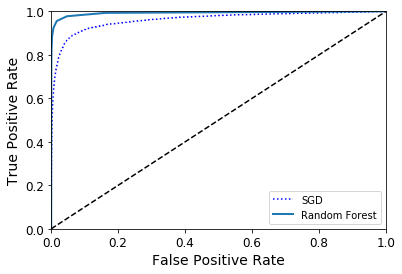

In [60]:
# lets plot the ROC curve
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [61]:
roc_auc_score(y_train_5,y_scores_forest)

0.9928250745111685

# Multiclass Classification

In [62]:
# using all 10 digits, 0-9, the classifier actually will train 10 binary classifiers
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [63]:
sgd_clf.predict([some_digit])

array([5])

In [64]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-279950.26419782, -108638.73078191, -211518.99365906,
        -160806.78344981, -227047.13677368,  -10770.25850009,
        -685340.83627136, -372150.92364883,  -96925.25735506,
        -597672.75843377]])

In [65]:
np.argmax(some_digit_scores)

5

In [66]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
from sklearn.multiclass import OneVsOneClassifier

In [68]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [69]:
ovo_clf.fit(X_train, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [70]:
ovo_clf.predict([some_digit])

array([5])

In [71]:
len(ovo_clf.estimators_)

45

In [72]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5])

In [73]:
# classifier is confident abouts its prediction, note 6th element (5) the 5th index the model estimates 90%
# probability that the image is a 5
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [74]:
# evaluate the SGDClassifier using cross validation
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.81908618, 0.86379319, 0.84492674])

In [75]:
apple = cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

In [76]:
# mean of cv results
np.mean(apple)

0.8426020371445939

In [77]:
# scaling inputs increases accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [78]:
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.91131774, 0.90884544, 0.90883633])

In [79]:
# confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5730,    2,   22,    9,   11,   52,   47,    8,   39,    3],
       [   1, 6459,   54,   29,    6,   43,    6,   11,  123,   10],
       [  53,   34, 5371,   90,   80,   23,   79,   57,  157,   14],
       [  48,   37,  147, 5315,    3,  248,   36,   58,  143,   96],
       [  20,   25,   45,   10, 5338,   10,   49,   36,   87,  222],
       [  72,   40,   38,  170,   72, 4616,  108,   28,  186,   91],
       [  35,   24,   56,    1,   39,   86, 5622,    6,   49,    0],
       [  22,   20,   73,   28,   48,   12,    4, 5832,   18,  208],
       [  53,  146,   84,  152,   14,  147,   55,   27, 5037,  136],
       [  44,   33,   29,   89,  164,   39,    3,  211,   77, 5260]])

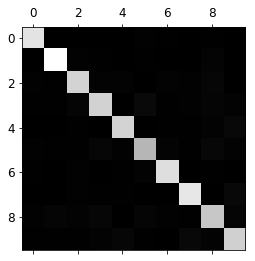

In [80]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

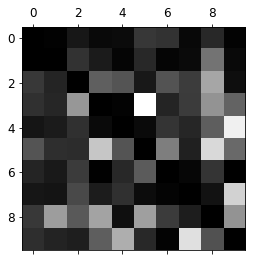

In [81]:
# errors classifier makes, remeber rows are actual and columns are predicted
# the lighter the grey the stronget the error
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [82]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

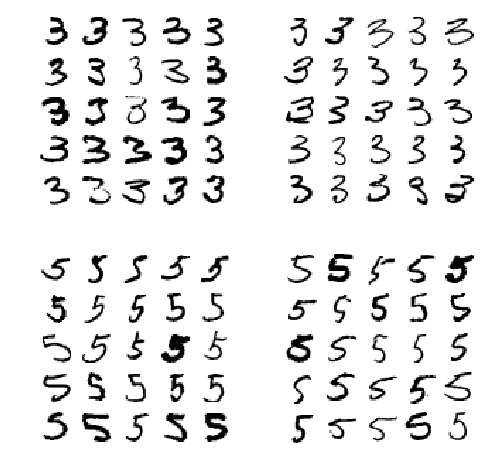

In [83]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
#save_fig("error_analysis_digits_plot")
plt.show()

In [84]:
# multilabel classification
from sklearn.neighbors import KNeighborsClassifier

In [85]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large,y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [86]:
knn_clf.predict([some_digit])

array([[False,  True]])

# Multioutput classification

In [88]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [90]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

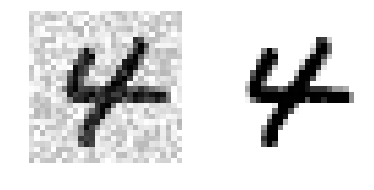

In [92]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
#save_fig("noisy_digit_example_plot")
plt.show()

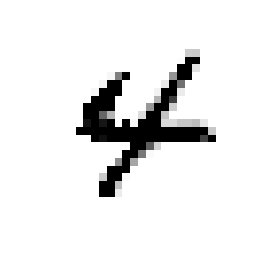

In [93]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)